In [12]:
from src.libs.lib import *
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df_original = pd.read_csv("src/data/usage_statistics_erp.csv")


In [19]:
display(df_original)

,Unnamed: 0,mes,qtde_adiantamentos,qtde_ajudas_de_custo,qtde_reembolsos,qtde_creditos,total_transacoes_mes
0,0,2024-05-01,12274,74,2840,608,15796
1,1,2024-06-01,13239,113,2322,598,16272
2,2,2024-07-01,15902,168,3515,758,20343
3,3,2024-08-01,16336,103,3385,823,20647
4,4,2024-09-01,17394,143,3369,906,21812
5,5,2024-10-01,20138,174,3168,965,24445
6,6,2024-11-01,20628,205,3021,971,24825
7,7,2024-12-01,21078,244,4007,999,26328
8,8,2025-01-01,20932,156,3639,973,25700
9,9,2025-02-01,20629,125,2949,1039,24742


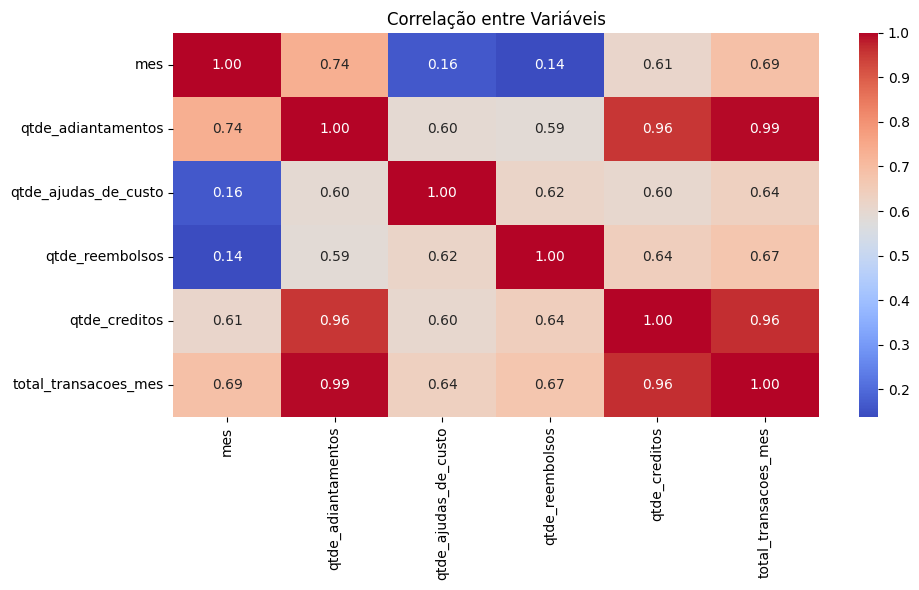

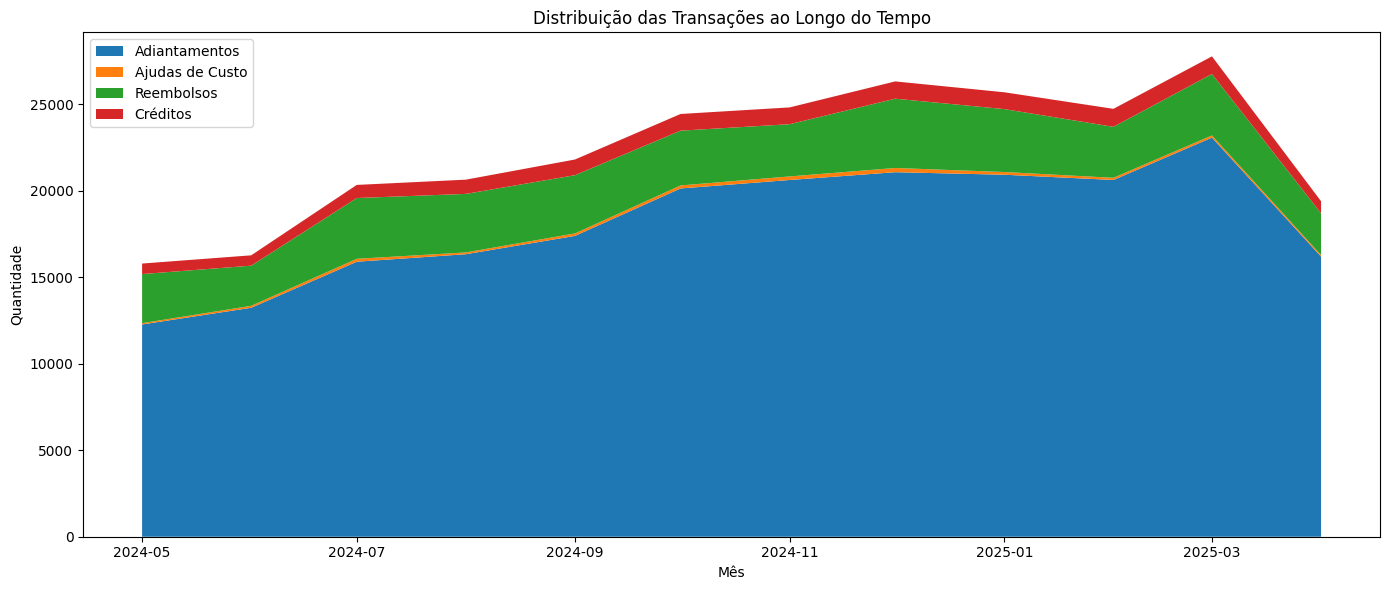

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Garantir que a coluna 'mes' esteja no formato datetime
df_original['mes'] = pd.to_datetime(df_original['mes'])

# 4. Heatmap de correlação entre variáveis
plt.figure(figsize=(10, 6))
sns.heatmap(df_original.drop(columns=['Unnamed: 0']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação entre Variáveis')
plt.tight_layout()
plt.show()

# 5. Gráfico de área - contribuição de cada tipo para o total
plt.figure(figsize=(14, 6))
plt.stackplot(df_original['mes'],
              df_original['qtde_adiantamentos'],
              df_original['qtde_ajudas_de_custo'],
              df_original['qtde_reembolsos'],
              df_original['qtde_creditos'],
              labels=['Adiantamentos', 'Ajudas de Custo', 'Reembolsos', 'Créditos'])
plt.title('Distribuição das Transações ao Longo do Tempo')
plt.xlabel('Mês')
plt.ylabel('Quantidade')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


/media/tschmitz/hope-keeper/2025_github/px-data-science/14 - ERP - Volume de solicitações de Reembolso, Adiantamento e Ajuda de Custo/.erp_venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


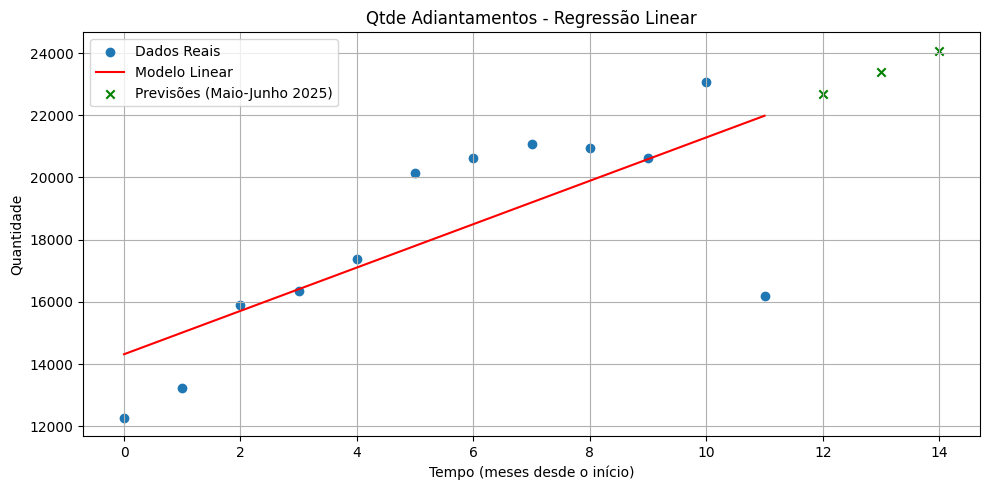

Previsões para qtde_adiantamentos:
2025-05: 22681
2025-06: 23378
2025-07: 24075
----------------------------------------


/media/tschmitz/hope-keeper/2025_github/px-data-science/14 - ERP - Volume de solicitações de Reembolso, Adiantamento e Ajuda de Custo/.erp_venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


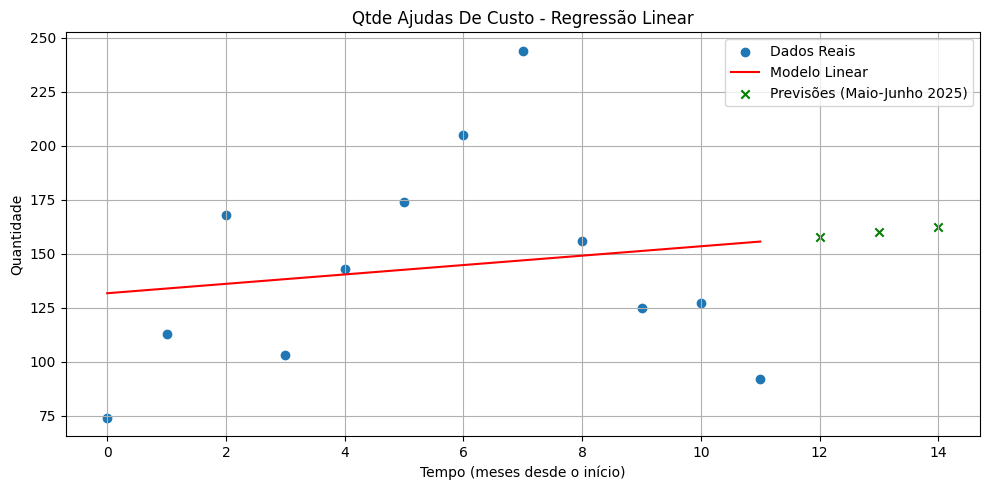

Previsões para qtde_ajudas_de_custo:
2025-05: 157
2025-06: 159
2025-07: 162
----------------------------------------


/media/tschmitz/hope-keeper/2025_github/px-data-science/14 - ERP - Volume de solicitações de Reembolso, Adiantamento e Ajuda de Custo/.erp_venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


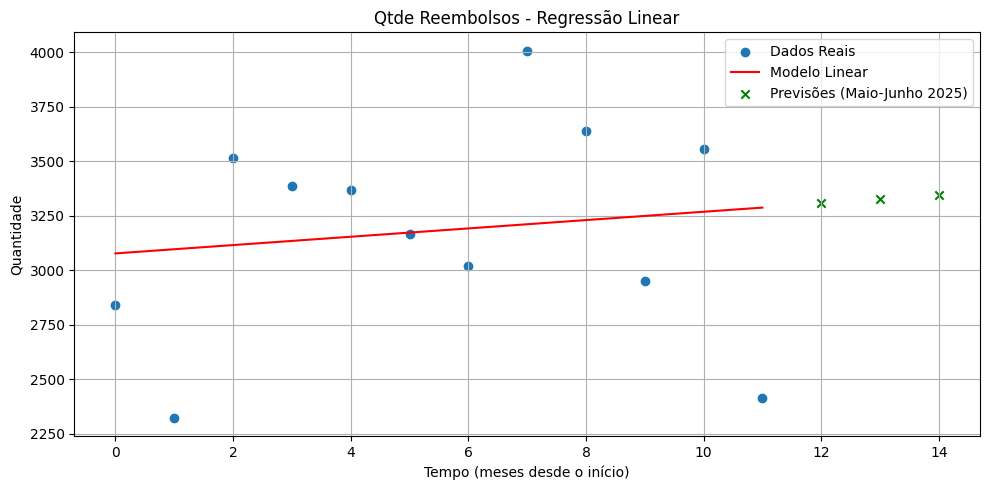

Previsões para qtde_reembolsos:
2025-05: 3306
2025-06: 3325
2025-07: 3344
----------------------------------------


/media/tschmitz/hope-keeper/2025_github/px-data-science/14 - ERP - Volume de solicitações de Reembolso, Adiantamento e Ajuda de Custo/.erp_venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


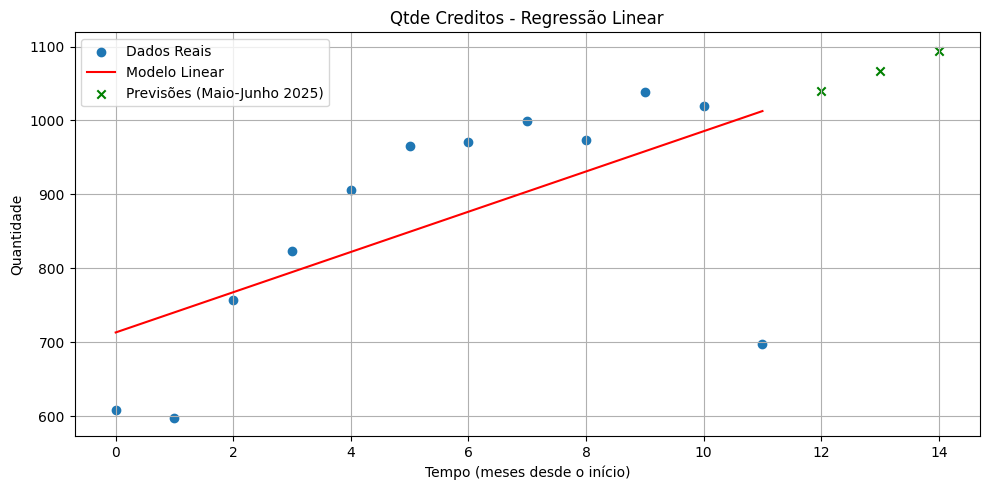

Previsões para qtde_creditos:
2025-05: 1039
2025-06: 1067
2025-07: 1094
----------------------------------------


/media/tschmitz/hope-keeper/2025_github/px-data-science/14 - ERP - Volume de solicitações de Reembolso, Adiantamento e Ajuda de Custo/.erp_venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


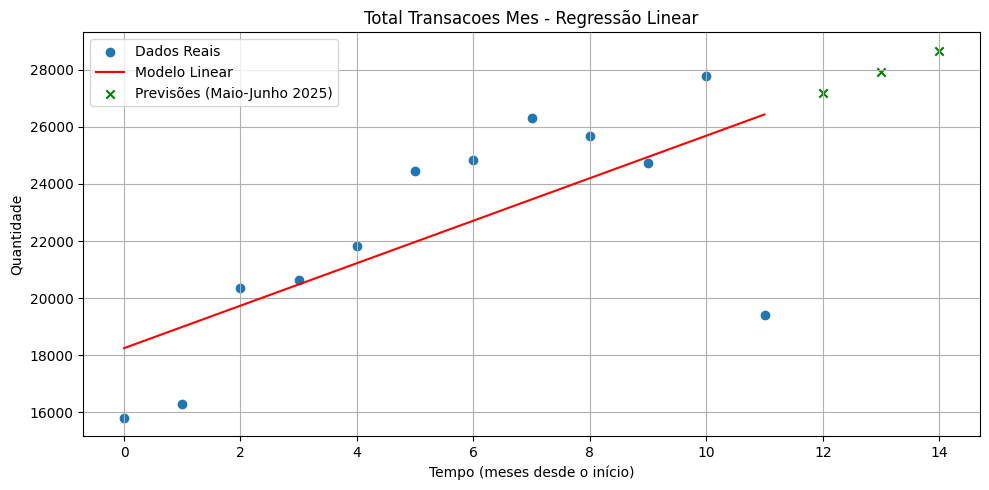

Previsões para total_transacoes_mes:
2025-05: 27185
2025-06: 27930
2025-07: 28676
----------------------------------------


In [18]:
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Garantir que os dados estejam ordenados por mês
df = df_original.sort_values('mes').copy()

# Criar uma variável numérica para representar o tempo (ex: 0, 1, 2, ...)
df['tempo'] = np.arange(len(df))

# Estimar para os próximos 3 meses
meses_prever = ['2025-05', '2025-06', '2025-07']
tempos_prever = np.array([len(df) + i for i in range(3)]).reshape(-1, 1)

# Lista de variáveis a prever
variaveis = [
    'qtde_adiantamentos',
    'qtde_ajudas_de_custo',
    'qtde_reembolsos',
    'qtde_creditos',
    'total_transacoes_mes'
]

# Loop para criar modelo e plotar resultados para cada variável
for var in variaveis:
    # Preparar os dados
    X = df[['tempo']]
    y = df[var]

    # Criar e ajustar modelo
    modelo = LinearRegression()
    modelo.fit(X, y)

    # Previsões no intervalo existente e nos meses futuros
    y_pred = modelo.predict(X)
    y_futuro = modelo.predict(tempos_prever)

    # Plot
    plt.figure(figsize=(10, 5))
    plt.scatter(df['tempo'], y, label='Dados Reais')
    plt.plot(df['tempo'], y_pred, color='red', label='Modelo Linear')
    plt.scatter(tempos_prever, y_futuro, color='green', label='Previsões (Maio-Junho 2025)', marker='x')
    
    plt.title(f'{var.replace("_", " ").title()} - Regressão Linear')
    plt.xlabel('Tempo (meses desde o início)')
    plt.ylabel('Quantidade')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Mostrar previsões numéricas
    print(f'Previsões para {var}:')
    for mes, valor in zip(meses_prever, y_futuro):
        print(f"{mes}: {int(valor)}")
    print('-' * 40)
